In [1]:
!pip install yfinance
import yfinance as yf
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
!pip install --upgrade pandas
import scipy.stats

C:\Users\johan\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
import risk as r

In [3]:
%load_ext autoreload
%autoreload
%matplotlib inline

In [40]:
# Acceso a precios historicos de multiples tickers 
prices_main = yf.download(tickers = ["ADBE","AMD","ASML","CRM","NVDA","TSM"],
                     interval='1d',
                     start='2018-01-01',)['Adj Close']

[*********************100%%**********************]  6 of 6 completed


In [28]:
#prices_main.index.to_period('M')

PeriodIndex(['2018-01', '2018-01', '2018-01', '2018-01', '2018-01', '2018-01',
             '2018-01', '2018-01', '2018-01', '2018-01',
             ...
             '2023-12', '2023-12', '2023-12', '2023-12', '2023-12', '2023-12',
             '2023-12', '2023-12', '2023-12', '2023-12'],
            dtype='period[M]', name='Date', length=1509)

In [41]:
# Lista de tickers
tickers = ["ADBE","AMD","ASML","CRM","NVDA","TSM"]

# Diccionario para almacenar los últimos precios y sus fechas
last_prices = {}

# Descargar los precios ajustados históricos para cada ticker
for ticker in tickers:
    prices = yf.download(ticker, interval='1d', start='2018-01-01', )['Adj Close']
    
    # Verificar que hay datos descargados
    if not prices.empty:
        # Obtener la fecha y el último precio disponible y agregar al diccionario
        last_date = prices.index[-1]
        last_price = prices.iloc[-1]
        last_prices[ticker] = (last_date, last_price)

# Crear una tabla con los últimos precios y fechas
last_price_table = pd.DataFrame.from_dict(last_prices, orient='index', columns=['Date', 'Last Price']).reset_index()
last_price_table.rename(columns={'index': 'Ticker'}, inplace=True)

# Mostrar la tabla
display(last_price_table)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Ticker,Date,Last Price
0,ADBE,2024-07-30,538.710022
1,AMD,2024-07-30,138.440002
2,ASML,2024-07-30,860.239990
3,CRM,2024-07-30,257.929993
4,NVDA,2024-07-30,103.730003
5,TSM,2024-07-30,154.539993


In [42]:
prices_main.head()

,ADBE,AMD,ASML,CRM,NVDA,TSM
Date,,,,,,
2018-01-02,177.699997,10.98,166.122253,104.111732,4.930643,34.540375
2018-01-03,181.039993,11.55,167.384079,104.989212,5.255147,35.121380
2018-01-04,183.220001,12.12,168.945023,106.375244,5.282849,34.936131
2018-01-05,185.339996,11.88,170.926575,107.791183,5.327616,35.752907
2018-01-08,185.039993,12.28,171.823853,108.549019,5.490859,35.736065


In [43]:
prices_main.tail()

,ADBE,AMD,ASML,CRM,NVDA,TSM
Date,,,,,,
2024-07-24,531.039978,144.630005,871.135925,249.779999,114.250000,159.800003
2024-07-25,532.150024,138.320007,861.034668,256.519989,112.279999,160.279999
2024-07-26,542.440002,139.990005,886.747009,262.709991,113.059998,161.940002
2024-07-29,536.609985,139.750000,870.549988,258.589996,111.589996,160.009995
2024-07-30,538.710022,138.440002,860.239990,257.929993,103.730003,154.539993


In [44]:
prices_main.columns

Index(['ADBE', 'AMD', 'ASML', 'CRM', 'NVDA', 'TSM'], dtype='object')

In [45]:
rt = prices_main.pct_change().dropna()

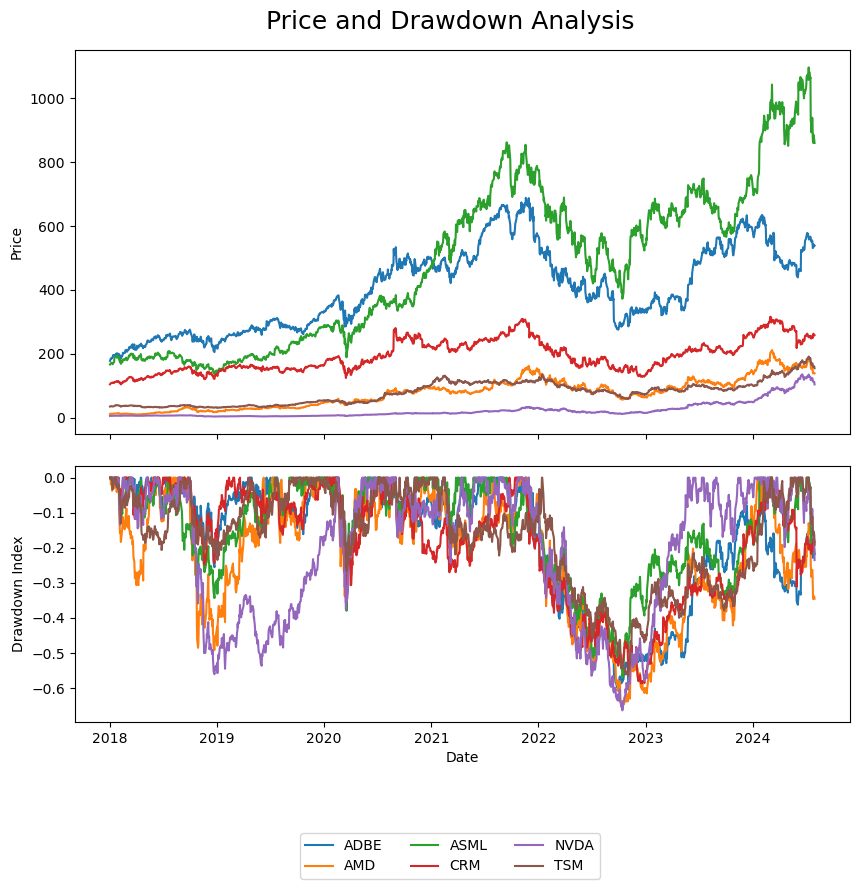

In [46]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 8), gridspec_kw={'height_ratios': [3, 2], 'hspace': 0.1})

# Plotting the prices on the first subplot
ax1.plot(prices_main)
ax1.set_ylabel('Price')
# Note: No need for xlabel here as it's shared with the second subplot

# Plotting the drawdowns on the second subplot
for ticker in rt:
    dd = r.drawdown(rt[ticker])['Drawdowns']
    ax2.plot(dd.index, dd.values, label=ticker)
ax2.set_xlabel('Date')
ax2.set_ylabel('Drawdown Index')
handles, labels = ax2.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, -0.02), ncol=3)
plt.tight_layout(rect=[0, 0.03, 1, 1])  # Adjust the rect to make space for the legend below the subplots
fig.suptitle('Price and Drawdown Analysis', fontsize=18, y=1.0)
fig.subplots_adjust(top=0.95)  # Ajusta según sea necesario
plt.show()

In [47]:
table = r.drawdown(rt["ADBE"])["Drawdowns"]

In [48]:
table

Date
2018-01-03    0.000000
2018-01-04    0.000000
2018-01-05    0.000000
2018-01-08   -0.001619
2018-01-09    0.000000
                ...   
2024-07-24   -0.228554
2024-07-25   -0.226942
2024-07-26   -0.211994
2024-07-29   -0.220463
2024-07-30   -0.217412
Name: Drawdowns, Length: 1653, dtype: float64

In [49]:
table.tail()

Date
2024-07-24   -0.228554
2024-07-25   -0.226942
2024-07-26   -0.211994
2024-07-29   -0.220463
2024-07-30   -0.217412
Name: Drawdowns, dtype: float64

In [50]:
# Dictionary to store results
drawdown_results = {}
for x in rt:
    dd = r.drawdown(rt[x])["Drawdowns"]
    max_drawdown = dd.min()
    index_drawdown = dd.idxmin()
    drawdown_results[x] = {'Max Drawdown': max_drawdown, 'Date of Max Drawdown': index_drawdown}

# Convert dictionary to DataFrame for table display
drawdown_table = pd.DataFrame(drawdown_results).T

# Print the table
display(drawdown_table)

,Max Drawdown,Date of Max Drawdown
ADBE,-0.600215,2022-09-30 00:00:00
AMD,-0.654499,2022-10-14 00:00:00
ASML,-0.568389,2022-10-14 00:00:00
CRM,-0.586172,2022-12-16 00:00:00
NVDA,-0.663351,2022-10-14 00:00:00
TSM,-0.564666,2022-11-03 00:00:00


In [59]:
def annualized_return(rt, periods_per_year):
    """
    Calculate the annualized return.
    
    Parameters:
    rt : array-like
        Array of returns.
    periods_per_year : int
        Number of periods in a year (e.g., 12 for monthly returns).
        
    Returns:
    float
        Annualized return.
    """
    compounded_growth = np.prod(1 + rt)
    n = len(rt)  # using len(rt) as rt may not be a numpy array with shape attribute
    ann_return = compounded_growth ** (periods_per_year / n) - 1
    return ann_return

rt_anualizado=annualized_return(rt,252)

In [60]:
def annualized_volatility(rt, periods_per_year):
    """
    Calculate the annualized volatility.
    
    Parameters:
    rt : array-like
        Array of returns.
    periods_per_year : int
        Number of periods in a year (e.g., 12 for monthly returns).
        
    Returns:
    float
        Annualized volatility.
    """
    volatility = np.std(rt) * (periods_per_year ** 0.5)
    return volatility

vol_anualizada=annualized_volatility(rt,252)

In [61]:
def sharpe_ratio(rt, riskfree_rate, periods_per_year):
    """
    Calculate the Sharpe ratio.
    
    Parameters:
    rt : array-like
        Array of returns.
    riskfree_rate : float
        The risk-free rate per period.
    periods_per_year : int
        Number of periods in a year (e.g., 12 for monthly returns).
        
    Returns:
    float
        Sharpe ratio.
    """
    # Convert the annual risk-free rate to the rate per period
    rf_per_period = (1 + riskfree_rate) ** (1 / periods_per_year) - 1
    excess_return = rt - rf_per_period
    ann_return = annualized_return(excess_return, periods_per_year)
    ann_vol = annualized_volatility(rt, periods_per_year)
    return ann_return / ann_vol

sharpe_ratio=sharpe_ratio(rt,0.03,252)

In [62]:
datos=pd.DataFrame({"Retorno Anualizado":rt_anualizado,"Volatilidad Anualizada":vol_anualizada,"Sharpe ratio":sharpe_ratio})
datos

,Retorno Anualizado,Volatilidad Anualizada,Sharpe ratio
ADBE,0.184214,0.366369,0.408693
AMD,0.471620,0.548230,0.782139
ASML,0.284927,0.398711,0.620808
CRM,0.148327,0.377823,0.304073
NVDA,0.591078,0.515471,1.056880
TSM,0.256613,0.347782,0.632673


In [17]:
result=pd.concat([rt.mean(),rt.std(), r.skewness(rt),r.kurtosis(rt), rt.aggregate(r.normal_test)],axis=1)
result.columns = ['Mean', 'Volatility', 'skewness','kurtosis', 'Normal Test']
result

,Mean,Volatility,skewness,kurtosis,Normal Test
Ticker,,,,,
AAON,0.038602,0.110764,-0.076800,1.650279,True
ACGL,0.016296,0.068978,-0.407678,2.082154,True
ACMR,0.106201,0.249748,0.371187,2.671359,True
AEHR,0.065712,0.310013,0.458142,3.350356,True
AMD,0.079752,0.145842,0.365737,1.561627,True
APO,0.038064,0.094143,-0.330325,2.638105,True
AXON,0.041463,0.093855,0.025640,1.482641,True
BAM,0.036472,0.102596,0.119094,2.472614,True
BRK-B,0.012595,0.034721,0.294987,1.635777,True


Text(0, 0.5, 'VaR')

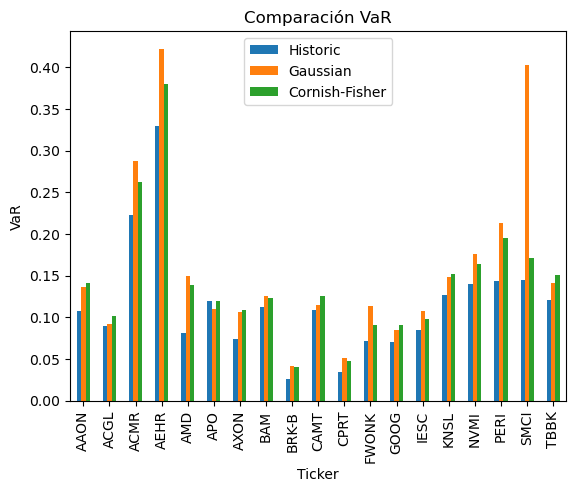

In [18]:
var_list=[r.var_historic(rt),r.var_gaussian(rt),r.var_gaussian(rt,modified=True)]
var_comparison=pd.concat(var_list, axis=1)
var_comparison.columns=["Historic","Gaussian", "Cornish-Fisher"]
ax=var_comparison.plot.bar(title="Comparación VaR")
ax.set_ylabel('VaR')

In [19]:
r.cvar_historic(rt)

Ticker
AAON     0.116225
ACGL     0.112558
ACMR     0.248826
AEHR     0.484464
AMD      0.088154
APO      0.137255
AXON     0.084476
BAM      0.140072
BRK-B    0.027485
CAMT     0.155156
CPRT     0.038813
FWONK    0.094345
GOOG     0.095825
IESC     0.121499
KNSL     0.193707
NVMI     0.155372
PERI     0.170748
SMCI     0.167106
TBBK     0.194854
dtype: float64

In [20]:
cov=rt.cov()

<Axes: title={'center': 'Modelo Markowitz'}, xlabel='Volatilidad', ylabel='Retornos'>

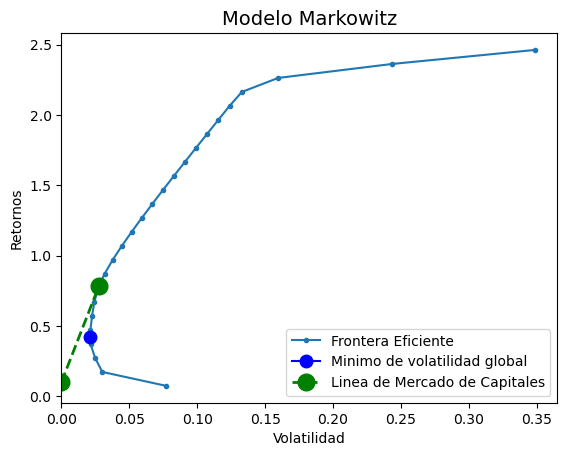

In [21]:
r.plot_ef(rt_anualizado,cov,25,show_cml=True,risk_free=0.1,show_gmv=True)

In [22]:
portafolio_gmv=r.gmv(cov)
portafolio_gmv.round(2)

array([0.  , 0.36, 0.  , 0.  , 0.09, 0.  , 0.16, 0.  , 0.33, 0.  , 0.  ,
       0.  , 0.03, 0.  , 0.  , 0.  , 0.  , 0.03, 0.  ])

In [24]:
weights=pd.DataFrame({"Compañia":prices.columns,"Weights":portafolio_gmv.round(3)})
weights

,Compañia,Weights
0,AAON,0.000
1,ACGL,0.359
2,ACMR,0.000
3,AEHR,0.000
4,AMD,0.089
5,APO,0.000
6,AXON,0.156
7,BAM,0.000
8,BRK-B,0.332
9,CAMT,0.000
